In [130]:
# !pip install openpyxl

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Now to download the data on which we will be performing data analysis , use this link - https://archive.ics.uci.edu/static/public/352/online+retail.zip
# After downloading the data unzip it and then perform the further steps .

In [5]:
df1 = pd.read_excel(r'G:\data_analytics_project\dataset\data.xlsx',dtype={'InvoiceNo':'string','StockCode':'string','Description':'string','Country':'string'})

In [ ]:
# Printing the head to understand the schema

df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
# Printing the shape so we can understand the total number of data we need to work with

df1.shape

(541909, 8)

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  string        
 1   StockCode    541909 non-null  string        
 2   Description  540455 non-null  string        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  string        
dtypes: datetime64[ns](1), float64(2), int64(1), string(4)
memory usage: 33.1 MB


In [ ]:
# Here we are checking the total number of null values present in the dataset

In [9]:
df1.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
# As we can see there are a lot of Description null we need to impute them by replacing it with the description has the highest number of counts and we can just ignore the customer id data or impute it with the numbers not present as an active customer id

In [99]:
df1[df1.Description.isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,<NA>,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,<NA>,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,<NA>,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,<NA>,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,<NA>,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,<NA>,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,<NA>,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [97]:
df1[df1.StockCode=='22139']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
106,536381,22139,RETROSPOT TEA SET CERAMIC 11 PC,23,2010-12-01 09:41:00,4.25,15311.0,United Kingdom
622,536414,22139,<NA>,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
6392,536942,22139,amazon,15,2010-12-03 12:08:00,0.00,NaN,United Kingdom
6885,536982,22139,RETROSPOT TEA SET CERAMIC 11 PC,10,2010-12-03 14:27:00,11.02,NaN,United Kingdom
7203,537011,22139,<NA>,-5,2010-12-03 15:38:00,0.00,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
538411,581405,22139,RETROSPOT TEA SET CERAMIC 11 PC,1,2011-12-08 13:50:00,4.95,13521.0,United Kingdom
539531,581439,22139,RETROSPOT TEA SET CERAMIC 11 PC,1,2011-12-08 16:30:00,10.79,NaN,United Kingdom
540441,581486,22139,RETROSPOT TEA SET CERAMIC 11 PC,6,2011-12-09 09:38:00,4.95,17001.0,United Kingdom
541387,581498,22139,RETROSPOT TEA SET CERAMIC 11 PC,2,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [12]:
df1[df1.StockCode=='23406']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
326086,565472,23406,HOME SWEET HOME KEY HOLDER,1,2011-09-05 10:15:00,6.25,16255.0,United Kingdom
326458,565541,23406,HOME SWEET HOME KEY HOLDER,1,2011-09-05 12:00:00,6.25,14159.0,United Kingdom
327509,565674,23406,HOME SWEET HOME KEY HOLDER,2,2011-09-06 09:49:00,6.25,15271.0,United Kingdom
328659,565800,23406,HOME SWEET HOME KEY HOLDER,2,2011-09-07 10:23:00,6.25,14911.0,EIRE
329324,565841,23406,HOME SWEET HOME KEY HOLDER,1,2011-09-07 12:04:00,12.46,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
525082,580612,23406,HOME SWEET HOME KEY HOLDER,2,2011-12-05 11:58:00,12.46,NaN,United Kingdom
525702,580635,23406,HOME SWEET HOME KEY HOLDER,1,2011-12-05 12:30:00,6.25,14649.0,United Kingdom
531326,580914,23406,HOME SWEET HOME KEY HOLDER,1,2011-12-06 13:42:00,6.25,14871.0,United Kingdom
531477,580956,23406,HOME SWEET HOME KEY HOLDER,2,2011-12-06 14:23:00,6.25,17841.0,United Kingdom


In [13]:
df1[df1.StockCode=='23406'].Description.mode()

0    HOME SWEET HOME KEY HOLDER
Name: Description, dtype: string

In [ ]:
# We are getiing the mode description for a stock code ie the maximum time a description given and replacing the n/a value for the stock codes with
# The mode description for the stock code , we also doing it for the other descriptions too which dont matches the mode description
# As some description may have garbage value.

In [ ]:
df1[df1.StockCode=='22139'].Description.mode()

0    RETROSPOT TEA SET CERAMIC 11 PC 
Name: Description, dtype: string

In [15]:
most_freq = df1[['StockCode','Description']].value_counts().reset_index()
most_freq

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,22423,REGENCY CAKESTAND 3 TIER,2200
2,85099B,JUMBO BAG RED RETROSPOT,2159
3,47566,PARTY BUNTING,1727
4,20725,LUNCH BAG RED RETROSPOT,1638
...,...,...,...
4787,22922,sold as set on dotcom,1
4788,22923,sold as set on dotcom,1
4789,22924,sold as set on dotcom,1
4790,22925,AMAZON,1


In [16]:
most_freq[most_freq.StockCode=='85123A']

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
3300,85123A,CREAM HANGING HEART T-LIGHT HOLDER,9
4266,85123A,?,1
4290,85123A,wrongly marked carton 22804,1


In [17]:
most_freq = most_freq.groupby('StockCode').head(1)
most_freq

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,22423,REGENCY CAKESTAND 3 TIER,2200
2,85099B,JUMBO BAG RED RETROSPOT,2159
3,47566,PARTY BUNTING,1727
4,20725,LUNCH BAG RED RETROSPOT,1638
...,...,...,...
4755,84227,HEN HOUSE W CHICK IN NEST,1
4759,16161M,WRAP PINK FLOCK,1
4760,21186,WHITE DOVE HONEYCOMB PAPER GARLAND,1
4779,90187A,BLUE DROP EARRINGS W BEAD CLUSTER,1


In [18]:
most_freq.columns=["StockCode","Freq_Description","count"]

In [ ]:
# We are updating the dataframe by adding a column with most freq description for the stock code for every stock code and the count for how many times 
# They have occured . we are performing join activity on stock code .

In [19]:
df2 = df1.merge(most_freq,on="StockCode",how="left")
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Freq_Description,count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,328.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER,293.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,473.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,449.0


In [20]:
df2['Description'] = df2['Freq_Description']
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Freq_Description,count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,328.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER,293.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,473.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,449.0


In [21]:
df2.isnull().sum()

InvoiceNo                0
StockCode                0
Description            112
Quantity                 0
InvoiceDate              0
UnitPrice                0
CustomerID          135080
Country                  0
Freq_Description       112
count                  112
dtype: int64

In [22]:
df2.dropna(subset=["Description"],inplace=True)
df2.isnull().sum()

InvoiceNo                0
StockCode                0
Description              0
Quantity                 0
InvoiceDate              0
UnitPrice                0
CustomerID          134968
Country                  0
Freq_Description         0
count                    0
dtype: int64

In [23]:
df2.drop(columns=["Freq_Description","count"],inplace=True)

In [24]:
df2.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541797.000000,541797,541797.000000,406829.000000
mean,9.555919,2011-07-04 14:06:48.671255296,4.612067,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:36:00,1.250000,13953.000000
50%,3.000000,2011-07-20 08:59:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:41:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.103428,NaN,96.769831,1713.600303


In [25]:
df2[df2.Quantity<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [26]:
df2[df2.UnitPrice<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [100]:
# As there are a lot of negative quantities which doesnt makes any sense , so we will be removing it as well as invalid unit prices too 
# So we will be discarding those and moving forward with the good data .

In [27]:
df3 = df2[(df2.UnitPrice>0) & (df2.Quantity>0)]
df3.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,530104.000000,530104,530104.000000,397884.000000
mean,10.542037,2011-07-04 20:16:05.225087744,3.907625,15294.423453
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,1.000000,2011-03-28 12:22:00,1.250000,13969.000000
50%,3.000000,2011-07-20 12:58:00,2.080000,15159.000000
75%,10.000000,2011-10-19 12:39:00,4.130000,16795.000000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000
std,155.524124,NaN,35.915681,1713.141560


In [28]:
df3.Quantity.quantile(0.99)

np.float64(100.0)

In [29]:
df3.Quantity.quantile(0.9999)

np.float64(1439.8763999990188)

In [101]:
# We are looking for the outliers in the quantity for detection . we can snip the outliers by removing the data which falls above the 99 percentage range .

In [30]:
df3[df3.Quantity>1500].head().reset_index()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,4850,536809,84950,ASSORTED COLOUR T-LIGHT HOLDER,1824,2010-12-02 16:48:00,0.55,15299.0,United Kingdom
1,4945,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,2010-12-02 17:38:00,0.18,16754.0,United Kingdom
2,25920,538420,17096,ASSORTED LAQUERED INCENSE HOLDERS,1728,2010-12-12 12:03:00,0.17,12875.0,United Kingdom
3,32671,539101,22693,GROW A FLYTRAP OR SUNFLOWER IN TIN,2400,2010-12-16 10:35:00,0.94,16029.0,United Kingdom
4,52709,540815,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1930,2011-01-11 12:55:00,2.55,15749.0,United Kingdom


In [ ]:
# Feature Engineering : Creating New Columns

In [32]:
df3.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [102]:
# We will be creating a new column ie the total sales column which will be a product of quantity * unit price , which will be helpful for getting insights

In [33]:
df4=df3.copy()
df4['TotalSales']=df4['Quantity']*df4['UnitPrice']
df4.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [34]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 530104 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    530104 non-null  string        
 1   StockCode    530104 non-null  string        
 2   Description  530104 non-null  string        
 3   Quantity     530104 non-null  int64         
 4   InvoiceDate  530104 non-null  datetime64[ns]
 5   UnitPrice    530104 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      530104 non-null  string        
 8   TotalSales   530104 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), string(4)
memory usage: 40.4 MB


In [ ]:
# we will create a month column from the time date column , so we can view in which month the sale is higher .

In [35]:
df4['Month']=df4["InvoiceDate"].dt.month
df4.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12


In [36]:
# EDA and visualizations

In [37]:
# Plot monthly sales

In [38]:
monthwise_sales=df4.groupby("Month")["TotalSales"].sum()
monthwise_sales

Month
1      691364.560
2      523631.890
3      717639.360
4      537808.621
5      770536.020
6      761739.900
7      719221.191
8      759138.380
9     1058590.172
10    1154979.300
11    1509496.330
12    1462538.820
Name: TotalSales, dtype: float64

In [39]:
# Plotting a bar chart of the monthly sales

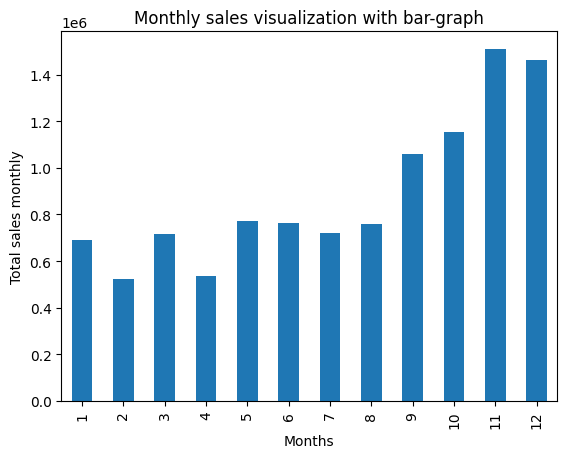

In [40]:
monthwise_sales.plot(kind='bar',title='Monthly sales visualization with bar-graph')
plt.xlabel('Months')
plt.ylabel('Total sales monthly')
plt.show()

In [41]:
# Plotting a line chart of the monthly sales

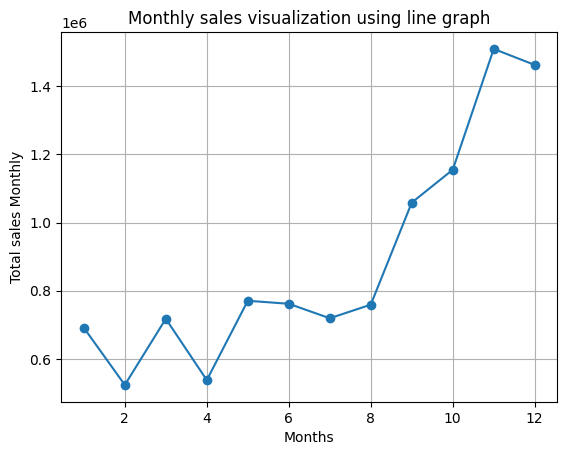

In [42]:
monthwise_sales.plot(kind='line',title='Monthly sales visualization using line graph',marker="o")
plt.xlabel('Months')
plt.ylabel('Total sales Monthly')
plt.grid()
plt.show()

In [43]:
# The line graph shows a hockey curve
# This shows that the sales are taking pace and rising up in august and having a peak in november . This is happening maybe due to holiday season
# Or the company wants to get rid of the old inventory , thus giving better offers to customers .

In [44]:
# Plotting top 5 countries by sales

In [45]:
countrywise_sales = df4.groupby('Country')['TotalSales'].sum()
top_countries_saleswise=countrywise_sales.sort_values(ascending=False).head(5)
top_countries_saleswise

Country
United Kingdom    9025222.084
Netherlands        285446.340
EIRE               283453.960
Germany            228867.140
France             209715.110
Name: TotalSales, dtype: float64

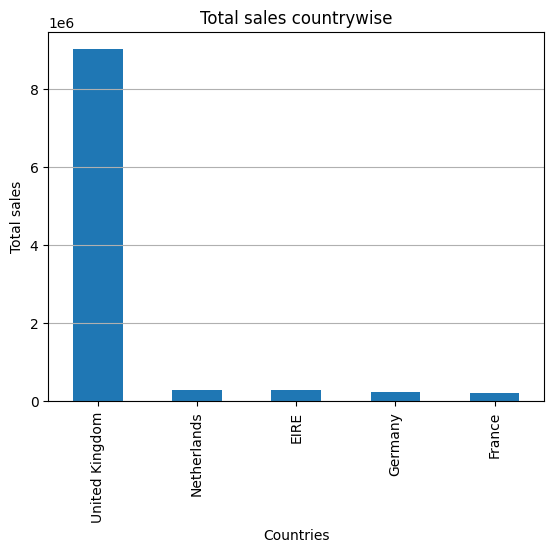

In [46]:
top_countries_saleswise.plot(kind='bar',title='Total sales countrywise')
plt.xlabel('Countries')
plt.ylabel('Total sales')
plt.grid(axis='y')
plt.show()

In [47]:
# As we can see that uk is dominating the graph thus we can understand that our sales heavily depends on uk , which means its a positively skewed distribution
# which is not a good indicator , as diversion is important for better sales as well as security 
# so we will now plot the rest of the 10 countries to visualize their sales data properly

In [48]:
filtered_countries_saleswise=df4.groupby('Country')['TotalSales'].sum().sort_values(ascending=False).head(11).iloc[1:6]
filtered_countries_saleswise

Country
Netherlands    285446.34
EIRE           283453.96
Germany        228867.14
France         209715.11
Australia      138521.31
Name: TotalSales, dtype: float64

In [49]:
# filtered_sales=seco_countries_saleswise.iloc[1:6]
# filtered_sales

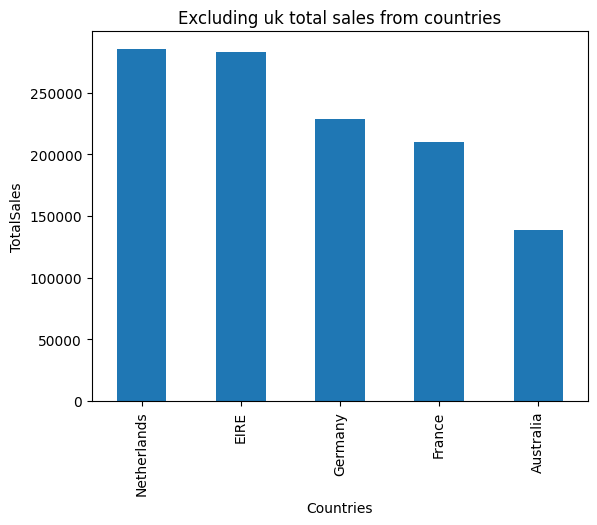

In [50]:
filtered_countries_saleswise.plot(kind='bar',title='Excluding uk total sales from countries')
plt.xlabel('Countries')
plt.ylabel('TotalSales')
plt.show()

In [51]:
# Now we can see that the skewness of the data has decreased and now it looks more normalised

In [52]:
grouped_sales = df4.groupby('Country')['TotalSales'].sum().sort_values(ascending=False).reset_index()
grouped_sales

,Country,TotalSales
0,United Kingdom,9025222.084
1,Netherlands,285446.340
2,EIRE,283453.960
3,Germany,228867.140
4,France,209715.110
5,Australia,138521.310
6,Spain,61577.110
7,Switzerland,57089.900
8,Belgium,41196.340
9,Sweden,38378.330


In [53]:
percentage=(grouped_sales['TotalSales'] / grouped_sales['TotalSales'].sum()) * 100
percentage

0     84.611315
1      2.676055
2      2.657376
3      2.145626
4      1.966076
5      1.298635
6      0.577284
7      0.535217
8      0.386215
9      0.359796
10     0.350778
11     0.339050
12     0.316379
13     0.211369
14     0.199493
15     0.191723
16     0.177706
17     0.163905
18     0.147110
19     0.127410
20     0.095612
21     0.076268
22     0.068762
23     0.044630
24     0.044529
25     0.040406
26     0.034372
27     0.033566
28     0.025552
29     0.017834
30     0.015880
31     0.015572
32     0.012190
33     0.010721
34     0.009397
35     0.007751
36     0.007070
37     0.001368
Name: TotalSales, dtype: float64

In [54]:
# So as we can see if we plot uk again it will make no sense as it will again skew the data and hamper it so will calculate percentage excluding uk

In [55]:
excluded_grouped_sales = df4.groupby('Country')['TotalSales'].sum().sort_values(ascending=False).iloc[1:].reset_index()
excluded_grouped_sales

,Country,TotalSales
0,Netherlands,285446.34
1,EIRE,283453.96
2,Germany,228867.14
3,France,209715.11
4,Australia,138521.31
5,Spain,61577.11
6,Switzerland,57089.90
7,Belgium,41196.34
8,Sweden,38378.33
9,Japan,37416.37


In [56]:
excluded_grouped_sales['exc_percentage']=(excluded_grouped_sales['TotalSales'] / excluded_grouped_sales['TotalSales'].sum()) * 100
excluded_grouped_sales=excluded_grouped_sales.iloc[:10]
excluded_grouped_sales

,Country,TotalSales,exc_percentage
0,Netherlands,285446.34,17.389757
1,EIRE,283453.96,17.268379
2,Germany,228867.14,13.942880
3,France,209715.11,12.776114
4,Australia,138521.31,8.438896
5,Spain,61577.11,3.751357
6,Switzerland,57089.90,3.477990
7,Belgium,41196.34,2.509734
8,Sweden,38378.33,2.338057
9,Japan,37416.37,2.279453


In [57]:
# now the data looks better , lets plot it now

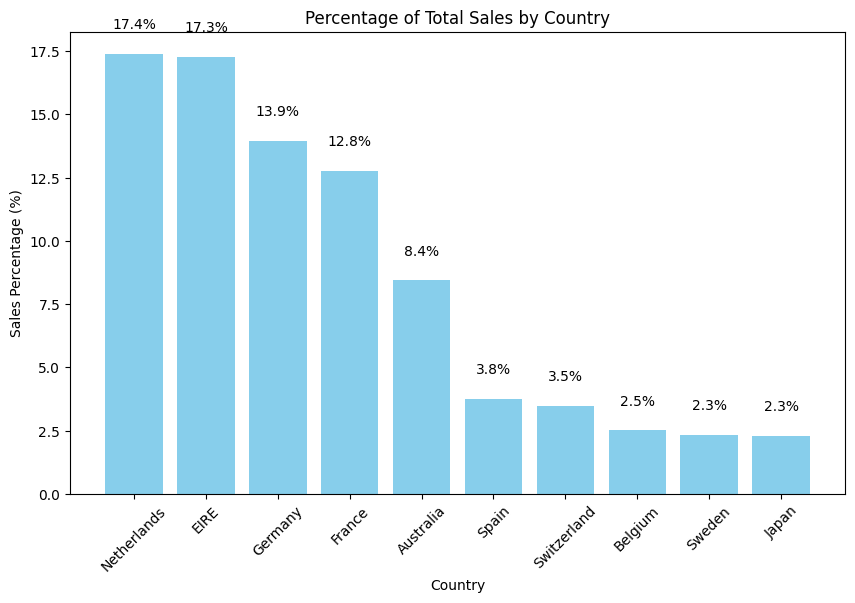

In [58]:
plt.figure(figsize=(10, 6))
plt.bar(excluded_grouped_sales['Country'], excluded_grouped_sales['exc_percentage'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Sales Percentage (%)')
plt.title('Percentage of Total Sales by Country')
for i, v in enumerate(excluded_grouped_sales['exc_percentage']):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center')

plt.xticks(rotation=45)
plt.show()

In [59]:
# Insights

# UK has the highest sales (around 9 million)
# Netherlands, EIRE, Germany and France are the next 4 countries each having a sales of more than 2 million
# Since these countries cover the major sales revenues, we need to pay special attention to customers in these countries and make sure our product quality and service are the best. Also to break dependancy of sales from a single country we can focus on expanding sales in other countries as well

In [60]:
# Now we will plot the top 10 product-wise sales

In [61]:
df4.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12


In [62]:
top_products_saleswise=df4.groupby('StockCode')['TotalSales'].sum().sort_values(ascending=False).head(10)
top_products_saleswise

StockCode
DOT       206248.77
22423     174484.74
23843     168469.60
85123A    104518.80
47566      99504.33
85099B     94340.05
23166      81700.92
M          78110.27
POST       78101.88
23084      66964.99
Name: TotalSales, dtype: float64

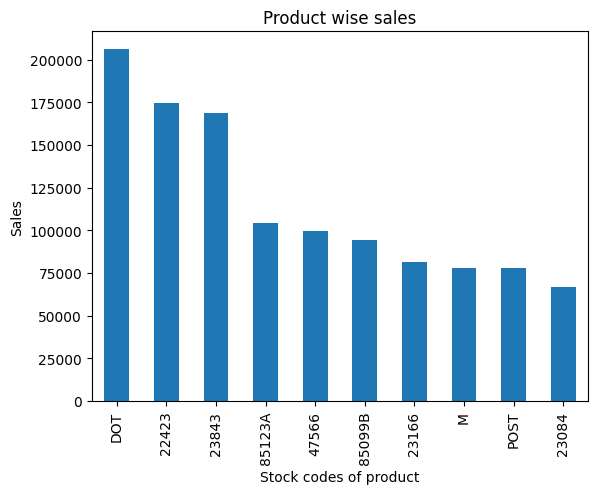

In [63]:
top_products_saleswise.plot(kind='bar',title='Product wise sales')
plt.xlabel('Stock codes of product')
plt.ylabel('Sales')
plt.show()

In [64]:
df4[df4.StockCode=="DOT"].Description.iloc[0]

'DOTCOM POSTAGE'

In [65]:
for stock_code in top_products_saleswise.index:
    description = df4[df4.StockCode==stock_code].Description.iloc[0]
    print(f"{stock_code} ==> {description}")

DOT ==> DOTCOM POSTAGE
22423 ==> REGENCY CAKESTAND 3 TIER
23843 ==> PAPER CRAFT , LITTLE BIRDIE
85123A ==> WHITE HANGING HEART T-LIGHT HOLDER
47566 ==> PARTY BUNTING
85099B ==> JUMBO BAG RED RETROSPOT
23166 ==> MEDIUM CERAMIC TOP STORAGE JAR
M ==> Manual
POST ==> POSTAGE
23084 ==> RABBIT NIGHT LIGHT


In [66]:
# Insights 

# We can get insights that our top selling product is 'DOTCOM POSTAGE' and we should focus on the betterment of the product as well as the other best-sellers
# The data is still kinda balanced so its ok

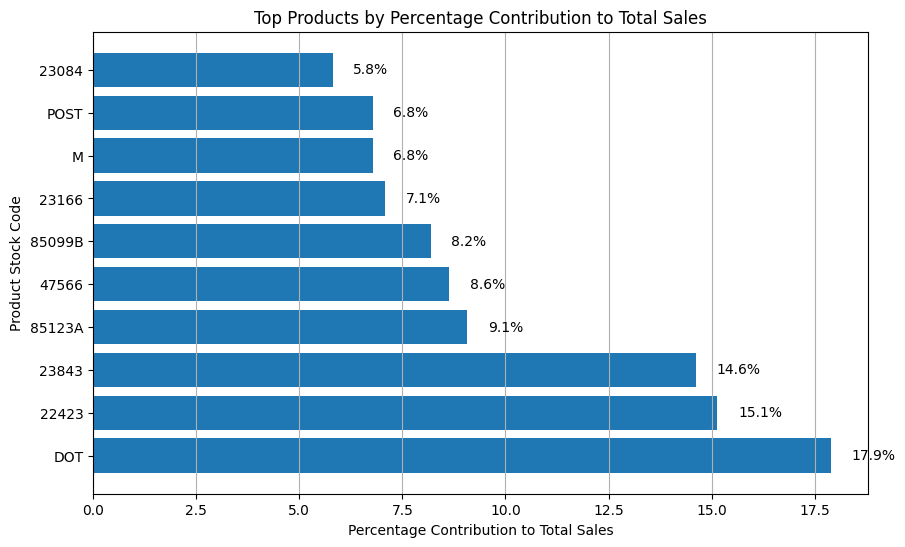

In [67]:
top_total_sales = top_products_saleswise.sum()
percentages = (top_products_saleswise / top_total_sales) * 100

plt.figure(figsize=(10, 6))
bars = plt.barh(top_products_saleswise.index, percentages)
plt.xlabel('Percentage Contribution to Total Sales')
plt.ylabel('Product Stock Code')
plt.title('Top Products by Percentage Contribution to Total Sales')
plt.grid(axis='x')

# Add percentage labels to the bars
for bar, percentage in zip(bars, percentages):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, f'{percentage:.1f}%', va='center')

plt.show()

In [68]:
# 4. RFM Analysis (Recency, Frequency, Monetary)

In [69]:
# For rfm analysis , as the data is very old we are adding +1 date to the last entry of data and continuing our work

In [70]:
ctt_dt= df4['InvoiceDate'].max()+pd.Timedelta(days=1)
ctt_dt

Timestamp('2011-12-10 12:50:00')

In [71]:
current_date = df4['InvoiceDate'].max() + pd.Timedelta(days=1)
rfm = df4.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (current_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalSales': 'sum'
})
rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


In [72]:
# We are carrying out this function to get the rfm and perform analysis

In [73]:
rfm.describe()

,Recency,Frequency,Monetary
count,4338.000000,4338.000000,4338.000000
mean,92.536422,91.720609,2054.266460
std,100.014169,228.785094,8989.230441
min,1.000000,1.000000,3.750000
25%,18.000000,17.000000,307.415000
50%,51.000000,41.000000,674.485000
75%,142.000000,100.000000,1661.740000
max,374.000000,7847.000000,280206.020000


In [74]:
# In this df
# Recency is the last date when the customer has purchased something from us
# Frequency is the number of times the customer has make purchases from us
# Monetary is the total amount of sales done to the customer

In [75]:
df4[df4.CustomerID==12347]["TotalSales"].sum()

np.float64(4310.000000000001)

In [76]:
df4[df4.CustomerID==12348]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Month
34083,539318,84992,72 SWEETHEART FAIRY CAKE CASES,72,2010-12-16 19:09:00,0.55,12348.0,Finland,39.60,12
34084,539318,22951,60 CAKE CASES DOLLY GIRL DESIGN,72,2010-12-16 19:09:00,0.55,12348.0,Finland,39.60,12
34085,539318,84991,60 TEATIME FAIRY CAKE CASES,24,2010-12-16 19:09:00,0.55,12348.0,Finland,13.20,12
34086,539318,84991,60 TEATIME FAIRY CAKE CASES,120,2010-12-16 19:09:00,0.42,12348.0,Finland,50.40,12
34087,539318,21213,PACK OF 72 SKULL CAKE CASES,24,2010-12-16 19:09:00,0.55,12348.0,Finland,13.20,12
34088,539318,21213,PACK OF 72 SKULL CAKE CASES,120,2010-12-16 19:09:00,0.42,12348.0,Finland,50.40,12
34089,539318,22616,PACK OF 12 LONDON TISSUES,72,2010-12-16 19:09:00,0.29,12348.0,Finland,20.88,12
34090,539318,21981,PACK OF 12 WOODLAND TISSUES,144,2010-12-16 19:09:00,0.29,12348.0,Finland,41.76,12
34091,539318,21982,PACK OF 12 SUKI TISSUES,144,2010-12-16 19:09:00,0.29,12348.0,Finland,41.76,12
34092,539318,21725,SWEETIES STICKERS,48,2010-12-16 19:09:00,0.85,12348.0,Finland,40.80,12


In [77]:
# Segment customers based on rfm
# By calculating rfm score we can segment which customers are valuable for us . Higher the rfm -> Higher the value.

In [78]:
rfm['R_segment'] = pd.qcut(rfm['Recency'],4,labels=[4,3,2,1])
rfm['F_segment'] = pd.qcut(rfm['Frequency'],4,labels=[1,2,3,4])
rfm['M_segment'] = pd.qcut(rfm['Monetary'],4,labels=[1,2,3,4])
rfm['RFM_score'] = rfm[['R_segment','F_segment','M_segment']].sum(axis=1)
rfm

,Recency,Frequency,Monetary,R_segment,F_segment,M_segment,RFM_score
CustomerID,,,,,,,
12346.0,326,1,77183.60,1,1,4,6
12347.0,2,182,4310.00,4,4,4,12
12348.0,75,31,1797.24,2,2,4,8
12349.0,19,73,1757.55,3,3,4,10
12350.0,310,17,334.40,1,1,2,4
...,...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1,3
18281.0,181,7,80.82,1,1,1,3
18282.0,8,12,178.05,4,1,1,6


In [79]:
rfm.sort_values('RFM_score',ascending=False)

,Recency,Frequency,Monetary,R_segment,F_segment,M_segment,RFM_score
CustomerID,,,,,,,
18198.0,4,159,5425.56,4,4,4,12
18210.0,2,134,2621.38,4,4,4,12
18225.0,3,271,5509.12,4,4,4,12
18283.0,4,756,2094.88,4,4,4,12
16983.0,13,148,1931.25,4,4,4,12
...,...,...,...,...,...,...,...
12402.0,323,11,225.60,1,1,1,3
18185.0,249,17,304.25,1,1,1,3
18190.0,192,15,284.46,1,1,1,3


In [80]:
# Insights

# So we have calculated the rfm score and ordered the customers accordingly ie in this table high_value customers are at the top and low at the bottom
# We can target the customers now accordingly which will help us generate more profitability by proper targeting of customers

In [81]:
# Finally customer churn analysis

In [82]:
df4.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12


In [83]:
# create a matrix of data for customerid and its latest purchase to know when the customer has last bought

In [84]:
cust_last_purchase = df4.groupby('CustomerID')['InvoiceDate'].max()
cust_last_purchase.head(5)

CustomerID
12346.0   2011-01-18 10:01:00
12347.0   2011-12-07 15:52:00
12348.0   2011-09-25 13:13:00
12349.0   2011-11-21 09:51:00
12350.0   2011-02-02 16:01:00
Name: InvoiceDate, dtype: datetime64[ns]

In [85]:
type(cust_last_purchase)

pandas.core.series.Series

In [86]:
current_date

Timestamp('2011-12-10 12:50:00')

In [87]:
cust_last_purchase = (current_date - cust_last_purchase).dt.days
cust_last_purchase.head(10)

CustomerID
12346.0    326
12347.0      2
12348.0     75
12349.0     19
12350.0    310
12352.0     36
12353.0    204
12354.0    232
12355.0    214
12356.0     23
Name: InvoiceDate, dtype: int64

In [88]:
cust_last_purchase.head(10).sort_values(ascending=False).reset_index()

,CustomerID,InvoiceDate
0,12346.0,326
1,12350.0,310
2,12354.0,232
3,12355.0,214
4,12353.0,204
5,12348.0,75
6,12352.0,36
7,12356.0,23
8,12349.0,19
9,12347.0,2


In [89]:
# Now we will be defining a churn threshold ie if somebody has not bought within the churn threshold that means , there is a high chance
# The customer will leave , so we will be sending better offers , reach out and have better profit by not losing a customer .

In [90]:
churn_threshold = 90
churned_customers = cust_last_purchase[cust_last_purchase > churn_threshold]
churned_customers.head(10).reset_index()

,CustomerID,InvoiceDate
0,12346.0,326
1,12350.0,310
2,12353.0,204
3,12354.0,232
4,12355.0,214
5,12361.0,287
6,12363.0,110
7,12365.0,291
8,12373.0,311
9,12377.0,315


In [91]:
churned_customers.describe

<bound method NDFrame.describe of CustomerID
12346.0    326
12350.0    310
12353.0    204
12354.0    232
12355.0    214
          ... 
18262.0    140
18268.0    134
18269.0    366
18280.0    278
18281.0    181
Name: InvoiceDate, Length: 1449, dtype: int64>

In [92]:
# plotting a histogram for showing the churn analysis

Number of churned customers 1449


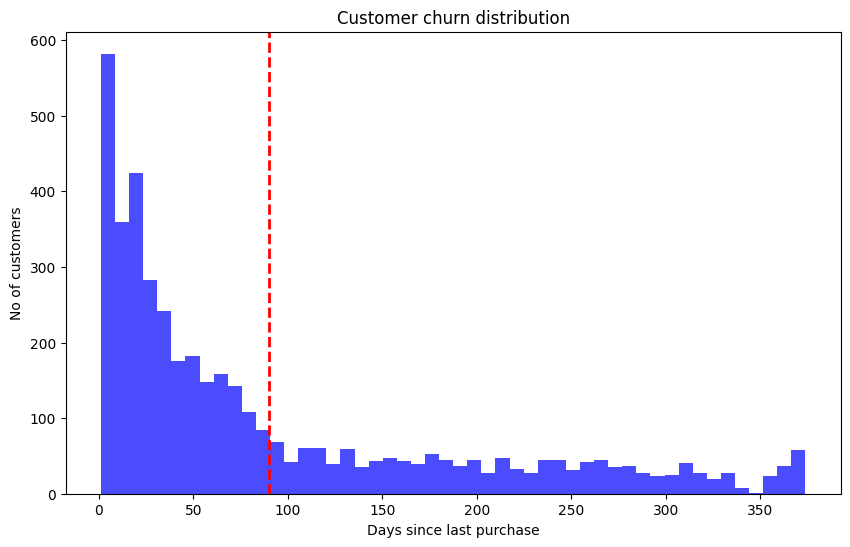

In [93]:
print("Number of churned customers",len(churned_customers))
plt.figure(figsize=(10,6))
plt.hist(cust_last_purchase,bins=50,color='blue',alpha=0.7)
plt.axvline(churn_threshold,color='red',linestyle='dashed',linewidth=2)
plt.title('Customer churn distribution')
plt.xlabel('Days since last purchase')
plt.ylabel('No of customers')
plt.show()

In [94]:
#Insights

# The customers after the dotted line has a high chance of churning , so we need to find ways to retain them 